# Testing colormaps on a organized line + Stratiform from ARM C-SAPR

In [1]:
#Imports
from matplotlib import pyplot as plt
import viscm
import pyart
from colorspacious import (cspace_converter, cspace_convert,
                           CIECAM02Space, CIECAM02Surround)

import numpy as np
import cartopy

%matplotlib inline

/Users/tjlang/anaconda/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Load colormaps from this repo

In [2]:
# Use this after updating colormaps.py
%run ../code/colormap_generator.py

### Make colormaps look like viewer has 100% deuteranomaly CVD

In [3]:
# from https://github.com/matplotlib/viscm/blob/master/viscm/gui.py
deuter50_space = {"name": "sRGB1+CVD",
                   "cvd_type": "deuteranomaly",
                   "severity": 100}

deuter50_to_sRGB1 = cspace_converter(deuter50_space, "sRGB1")

def deuter_transform(RGBA):
            # clipping, alpha handling
            RGB = RGBA[..., :3]
            RGB = np.clip(deuter50_to_sRGB1(RGB), 0, 1)
            return np.concatenate((RGB, RGBA[..., 3:]), axis=-1)

In [4]:
deuter_HomeyerRainbow = viscm.gui.TransformedCMap(deuter_transform, HomeyerRainbow)
deuter_HomeyerRainbow.N = HomeyerRainbow.N

deuter_LangRainbow12 = viscm.gui.TransformedCMap(deuter_transform, LangRainbow12)
deuter_LangRainbow12.N = LangRainbow12.N

deuter_NWSRef = viscm.gui.TransformedCMap(deuter_transform, pyart.graph.cm.NWSRef)
deuter_NWSRef.N = pyart.graph.cm.NWSRef.N

deuter_Carbone11 = viscm.gui.TransformedCMap(deuter_transform, pyart.graph.cm.Carbone11)
deuter_Carbone11.N = pyart.graph.cm.Carbone11.N



### Make colormaps for Protanopia

In [5]:
# from https://github.com/matplotlib/viscm/blob/master/viscm/gui.py
protanopia_space = {"name": "sRGB1+CVD",
                   "cvd_type": "protanomaly",
                   "severity": 100}

protanopia_to_sRGB1 = cspace_converter(protanopia_space, "sRGB1")

def protanopia_transform(RGBA):
            # clipping, alpha handling
            RGB = RGBA[..., :3]
            RGB = np.clip(protanopia_to_sRGB1(RGB), 0, 1)
            return np.concatenate((RGB, RGBA[..., 3:]), axis=-1)

In [6]:
protanopia_HomeyerRainbow = viscm.gui.TransformedCMap(protanopia_transform, HomeyerRainbow)
protanopia_HomeyerRainbow.N = HomeyerRainbow.N

protanopia_LangRainbow12 = viscm.gui.TransformedCMap(protanopia_transform, LangRainbow12)
protanopia_LangRainbow12.N = LangRainbow12.N

protanopia_NWSRef = viscm.gui.TransformedCMap(protanopia_transform, pyart.graph.cm.NWSRef)
protanopia_NWSRef.N = pyart.graph.cm.NWSRef.N

protanopia_Carbone11 = viscm.gui.TransformedCMap(protanopia_transform, pyart.graph.cm.Carbone11)
protanopia_Carbone11.N = pyart.graph.cm.Carbone11.N



### Evaluate colormaps using VISCM

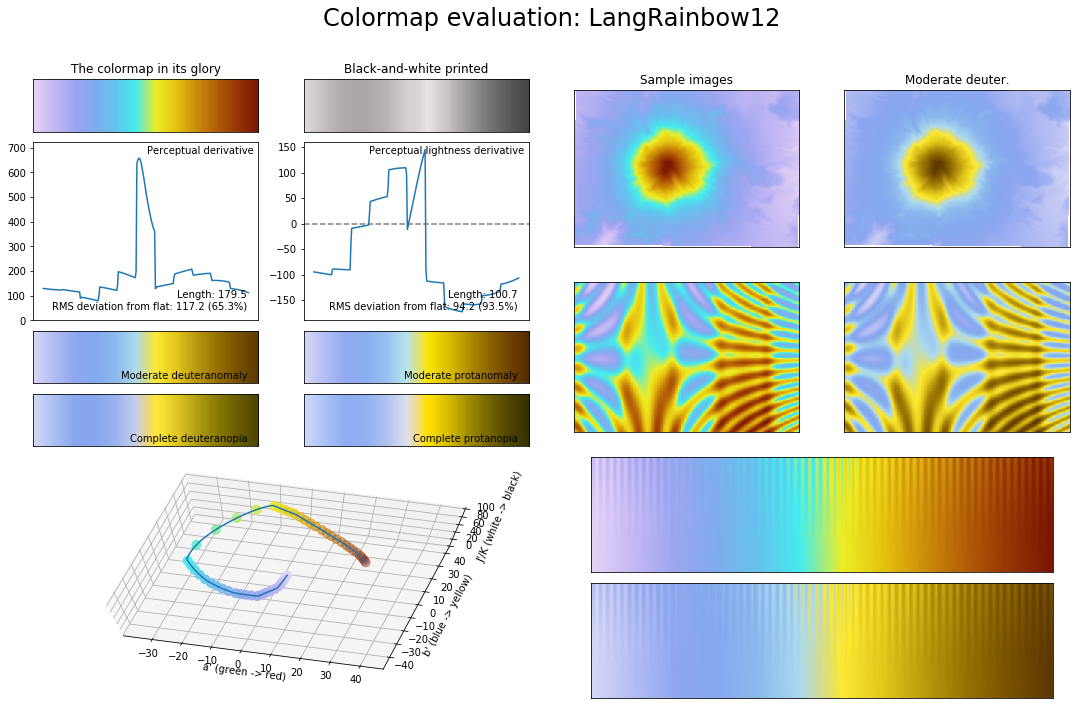

In [7]:
myfig = plt.figure(figsize=[15,10])
ret = viscm.viscm(LangRainbow12, figure=myfig)

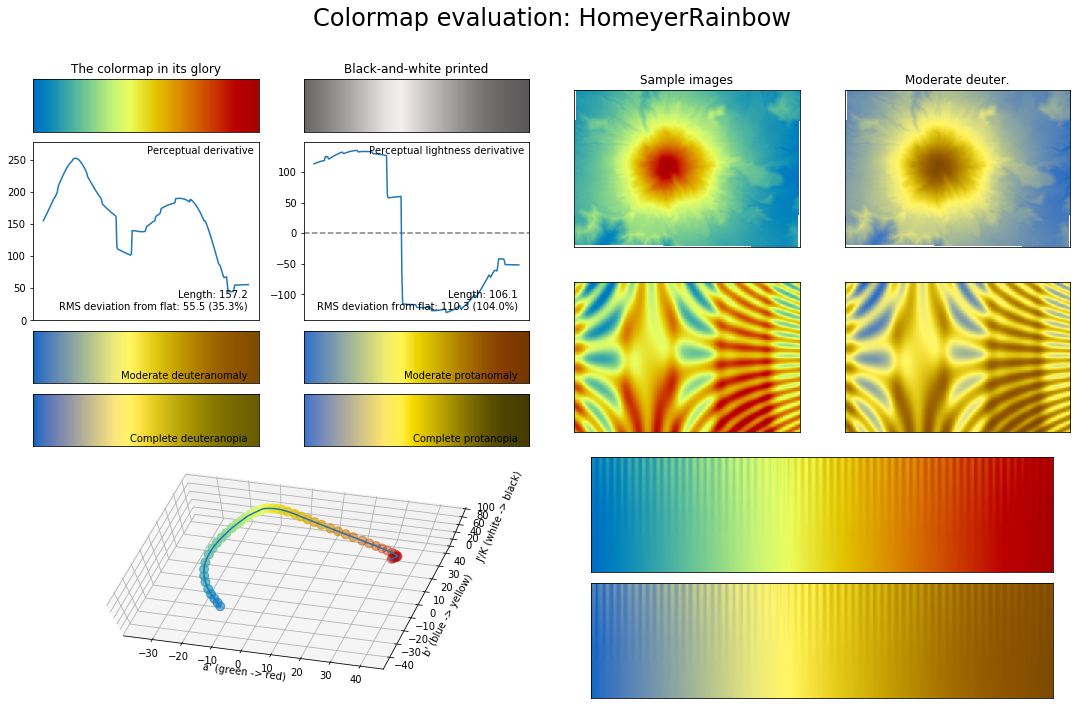

In [8]:
myfig = plt.figure(figsize=[15,10])
ret = viscm.viscm(HomeyerRainbow, figure=myfig)

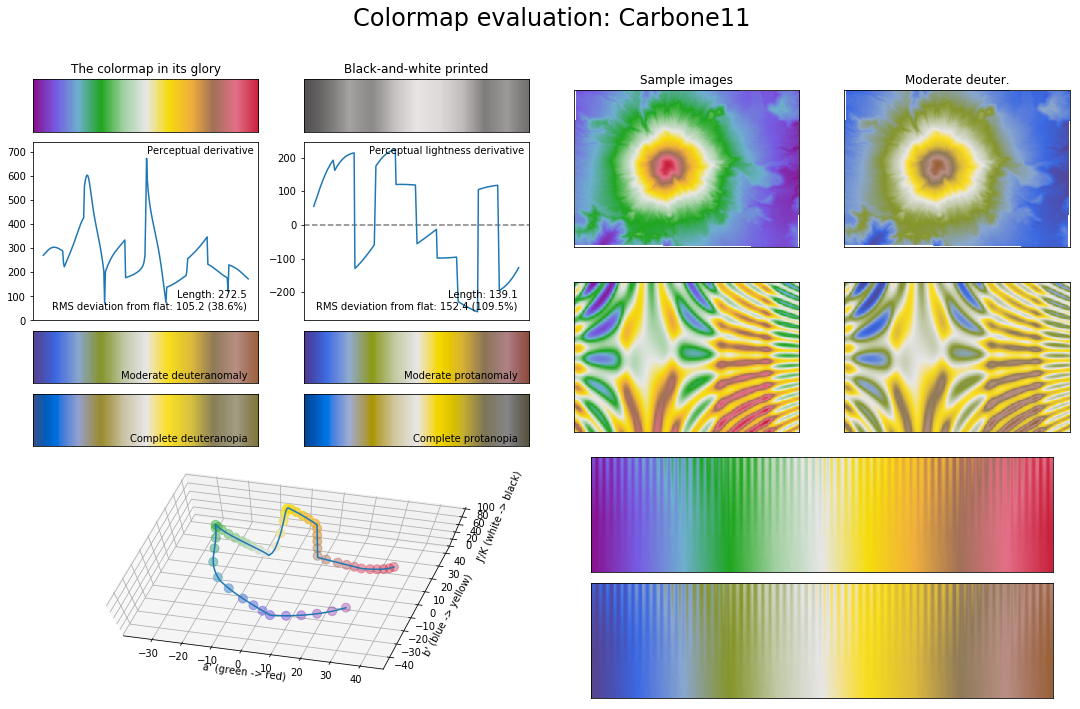

In [9]:
myfig = plt.figure(figsize=[15,10])
ret = viscm.viscm(pyart.graph.cm.Carbone11, figure=myfig)

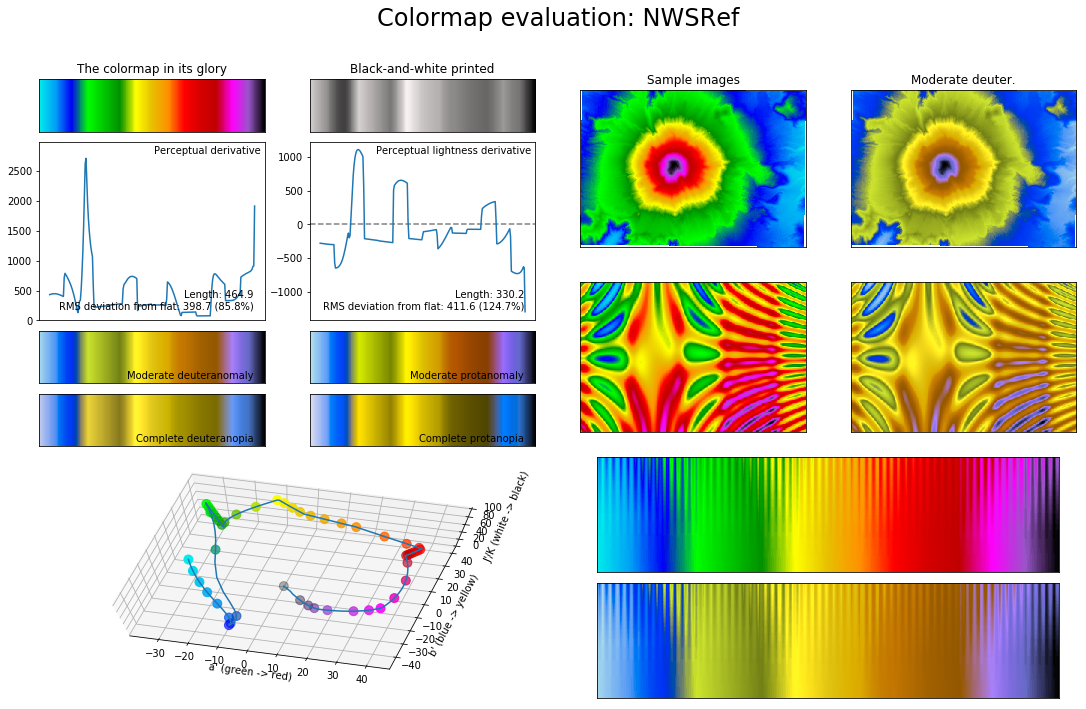

In [10]:
myfig = plt.figure(figsize=[15,10])
ret = viscm.viscm(pyart.graph.cm.NWSRef, figure=myfig)

### Read in case data

In [11]:
# This will be modified to live grab C-SAPR data once API is live
radar = pyart.io.read('/data/csapr_mc3e_20_may/sur/20110520/110635.mdv')

In [12]:
max_z = 64.
min_z = -8.

### Colormaps in all thier glory

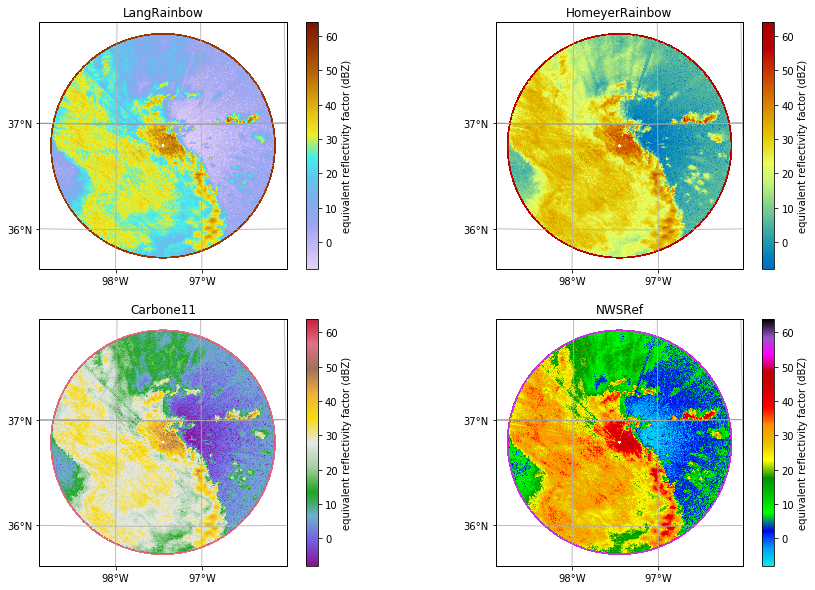

In [13]:
radar_display = pyart.graph.RadarMapDisplayCartopy(radar)
projection = cartopy.crs.LambertConformal(
                    central_longitude=radar_display.loc[1], central_latitude=radar_display.loc[0])

f, axarr = plt.subplots(2, 2, subplot_kw={'projection' : projection}, figsize=[15,10])
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=LangRainbow12, ax=axarr[0][0], title="LangRainbow")
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow')
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=pyart.graph.cm.Carbone11, ax=axarr[1][0], title='Carbone11')
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=pyart.graph.cm.NWSRef, ax=axarr[1][1], title='NWSRef')
plt.savefig('../images/csapr_ref_no_CVD.png')



### Colormaps with CVD perception filter on

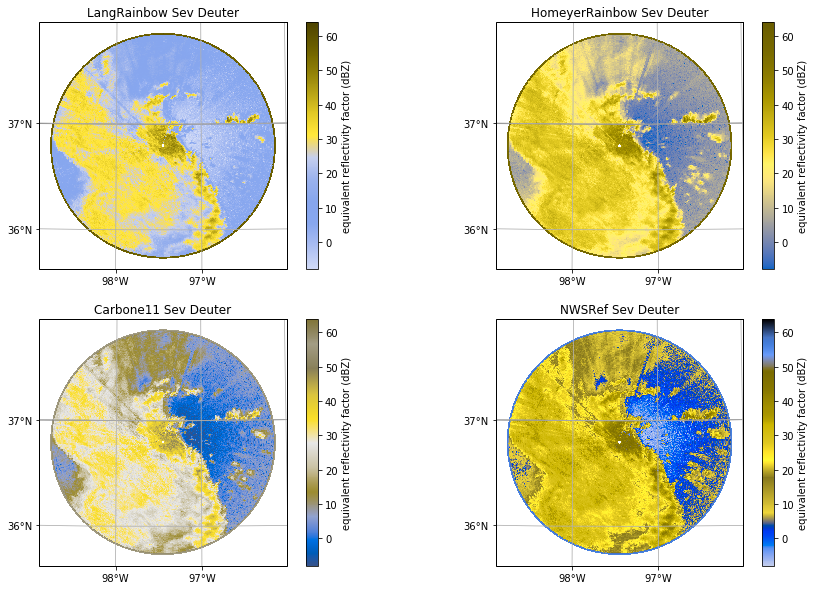

In [14]:
radar_display = pyart.graph.RadarMapDisplayCartopy(radar)
projection = cartopy.crs.LambertConformal(
                    central_longitude=radar_display.loc[1], central_latitude=radar_display.loc[0])

f, axarr = plt.subplots(2, 2, subplot_kw={'projection' : projection}, figsize=[15,10])
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=deuter_LangRainbow12, ax=axarr[0][0], title='LangRainbow Sev Deuter')
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=deuter_HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow Sev Deuter')
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=deuter_Carbone11, ax=axarr[1][0], title='Carbone11 Sev Deuter')
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=deuter_NWSRef, ax=axarr[1][1], title='NWSRef Sev Deuter')

plt.savefig('../images/csapr_ref_100_deuter.png')


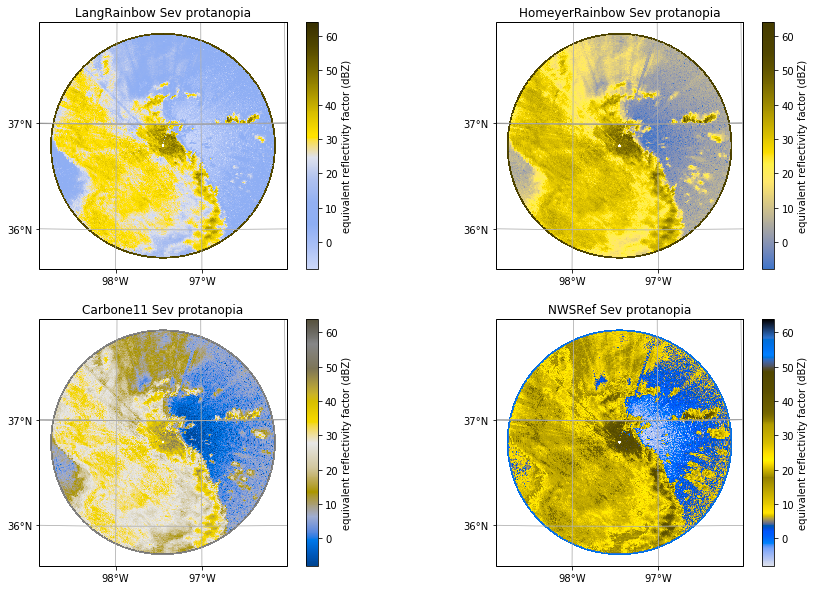

In [15]:
radar_display = pyart.graph.RadarMapDisplayCartopy(radar)
projection = cartopy.crs.LambertConformal(
                    central_longitude=radar_display.loc[1], central_latitude=radar_display.loc[0])

f, axarr = plt.subplots(2, 2, subplot_kw={'projection' : projection}, figsize=[15,10])
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=protanopia_LangRainbow12, ax=axarr[0][0], title='LangRainbow Sev protanopia')
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=protanopia_HomeyerRainbow, ax=axarr[0][1], title='HomeyerRainbow Sev protanopia')
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=protanopia_Carbone11, ax=axarr[1][0], title='Carbone11 Sev protanopia')
radar_display.plot_ppi_map('reflectivity', sweep=1, vmin=min_z, vmax=max_z, 
                           cmap=protanopia_NWSRef, ax=axarr[1][1], title='NWSRef Sev protanopia')

plt.savefig('../images/csapr_ref_100_protanopia.png')
